In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [22]:
data, target, coef = datasets.make_regression(n_samples=1000, 
                                              n_features = 2, 
                                              n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, 
                                              coef = True, 
                                              random_state = 2)

градиентный спуск

In [23]:
X = data.copy()
Y = target.copy()

# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gs.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gs[-1], 4)}')
print(f'Количество выполненных итераций равно {iter_num}')

TypeError: mserror() takes 2 positional arguments but 3 were given

стохастический градиентный спуск

In [10]:
data = data.copy()
target = target.copy()
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgs.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgs[-1], 4)}')
print(f'Количество выполненных итераций равно {iter_num}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 457.0203
Количество выполненных итераций равно 75746


Text(0, 0.5, 'MSE')

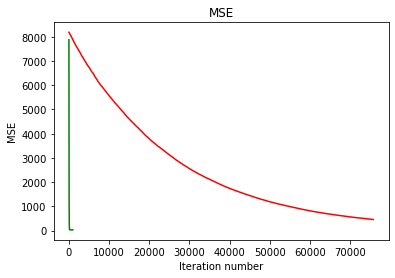

In [11]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gs)), errors_gs, color='g')
plt.plot(range(len(errors_sgs)), errors_sgs, color='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как видно из представленных реализаций градиентного спуска и стохастического градиентного спуска, количество итераций для графиентного спуска на 2 порядка меньше (986 и 75746), чем для стохастического градиентноо спуска, чтобы обеспечить заданную разницу весов 1е-08. А значит, сходимость стохастического градиентного спуса хуже.

Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [25]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
def gb(X, y, iterations=1e4, alpha=1e-2, lambda_=1e-4):
    
    X = X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))+ 2*lambda_*W) # <- L2
        
        errors.append([i, err])
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    errors = np.array(errors)
    return errors

In [27]:
def sgb(X, y, iterations=1e4, qty_in_batch=1, alpha=1e-2, lambda_=1e-4):
    
    X=X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            
            y_pred_tmp = np.dot(W, X_tmp)
            err = mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + 2*lambda_*W) # <- L2
            
            errors.append([i, err])

        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    return errors

In [28]:
iter_ = 1000
alpha = 1e-2

In [29]:
gb_res = gb(X=data, y=target, iterations=iter_, alpha=alpha, lambda_=1e-4)

100 [52.80444796 58.05812318] 219.74873485100014
200 [60.40429467 66.23029886] 34.16922692527736
300 [61.49602373 67.38511749] 27.863654285664595
400 [61.652719   67.54842999] 27.37373049708524
500 [61.6751924  67.57154142] 27.31223748487561
600 [61.6784134  67.57481415] 27.303647874984865
700 [61.67887477 67.57527786] 27.302427930429978
800 [61.67894082 67.5753436 ] 27.302254243779906
900 [61.67895027 67.57535292] 27.302229506017326
1000 [61.67895162 67.57535424] 27.302225982364828


In [30]:
sgb_res = sgb(X=data, y=target, iterations=iter_, qty_in_batch=32, alpha=alpha, lambda_=1e-4)

100 [42.94426562 47.20105791] 340.4949997293713
200 [46.32675158 50.88324316] 232.40760937469156
300 [46.5929588  51.16806131] 224.87787941146013
400 [46.61389111 51.19010919] 224.2946910103983
500 [46.61553575 51.19181715] 224.24912922188082
600 [46.61566488 51.19194954] 224.24556790298675
700 [46.61567501 51.19195981] 224.2452895675655
800 [46.6156758  51.19196061] 224.24526781756046
900 [46.61567587 51.19196067] 224.24526611818914
1000 [46.61567587 51.19196067] 224.24526598543184


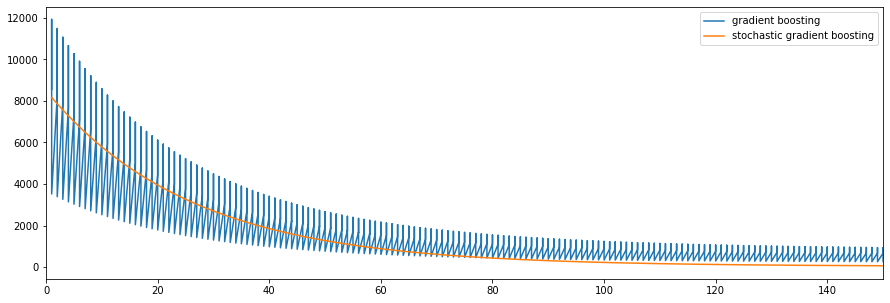

In [31]:
plt.figure(figsize=(15, 5))

plt.plot(sgb_res[:,0], sgb_res[:,1], label='gradient boosting')
plt.plot(gb_res[:,0], gb_res[:,1], label='stochastic gradient boosting')

plt.legend()
plt.xlim(0,150)

plt.show()